
### task 1a.

From the measurement record log file visualize the data. Read the Appendix 5.3.1
in order to understand what each column represents. What do you observe?
Summarize what you have understood and write it down in your report.

Data Preview:
   1603888288.04725385  0.04318800  -0.02989000  1.01260000  0.01688797  \
0         1.603888e+09    0.044286    -0.030012    1.009794   -0.193093   
1         1.603888e+09    0.044408    -0.029280    1.009672    0.059218   
2         1.603888e+09    0.044042    -0.062464    1.001620   -0.106393   
3         1.603888e+09    0.041602    -0.031964    1.008574   -0.164112   
4         1.603888e+09    0.043432    -0.029768    1.009550    0.046192   

   -0.02758630  -0.15492750  0.42567000  0.08835750  0.03083894  -0.27652733  \
0     0.003005    -0.119928     0.28567   -0.156642    0.023093    -0.271996   
1    -0.085141    -0.049927     0.04067   -0.121643    0.023093    -0.271996   
2    -0.033711    -0.189927     0.32067   -0.121643    0.027331    -0.273458   
3     0.075452    -0.189927     0.21567    0.053358    0.027331    -0.273458   
4     0.027059    -0.084928    -0.30933    0.053358    0.021631    -0.276381   

   0.19175680  
0    0.187957  
1    0.187957  
2    0

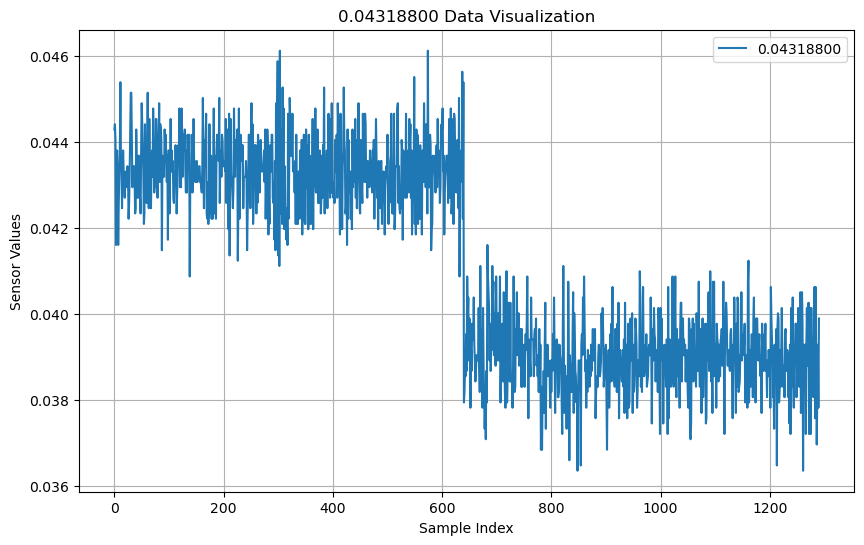

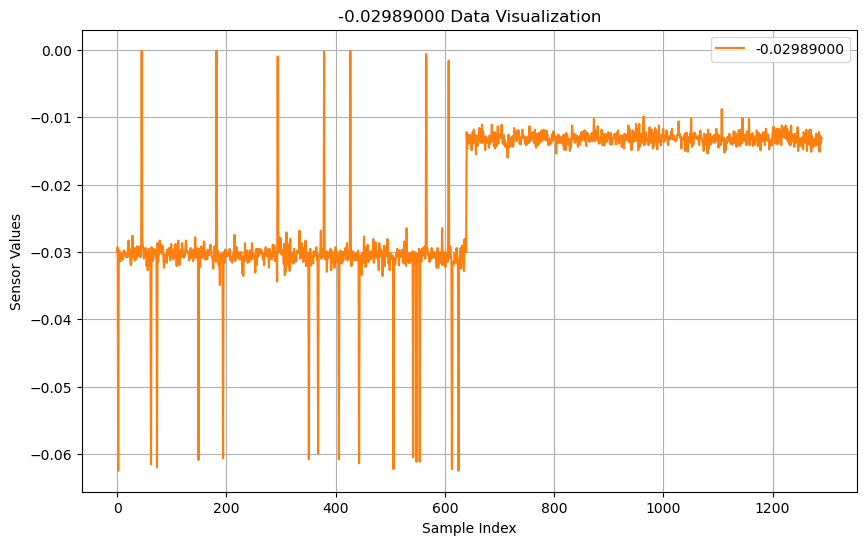

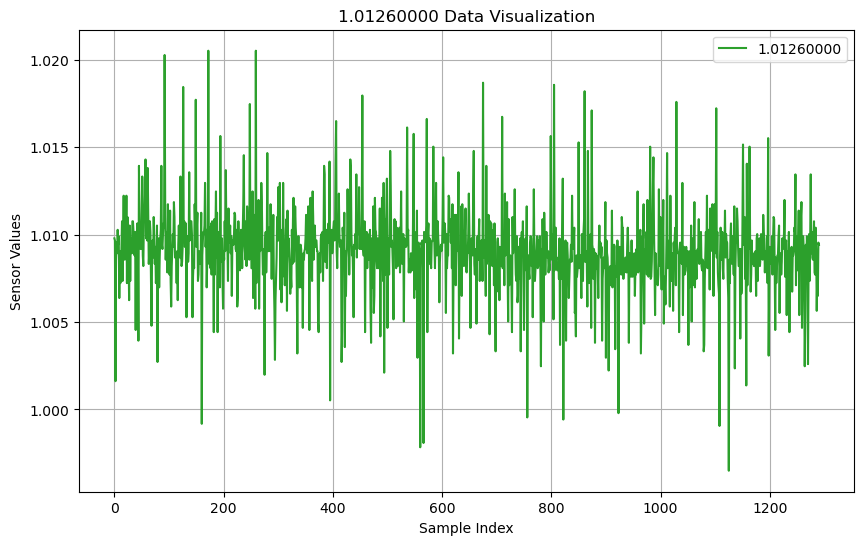

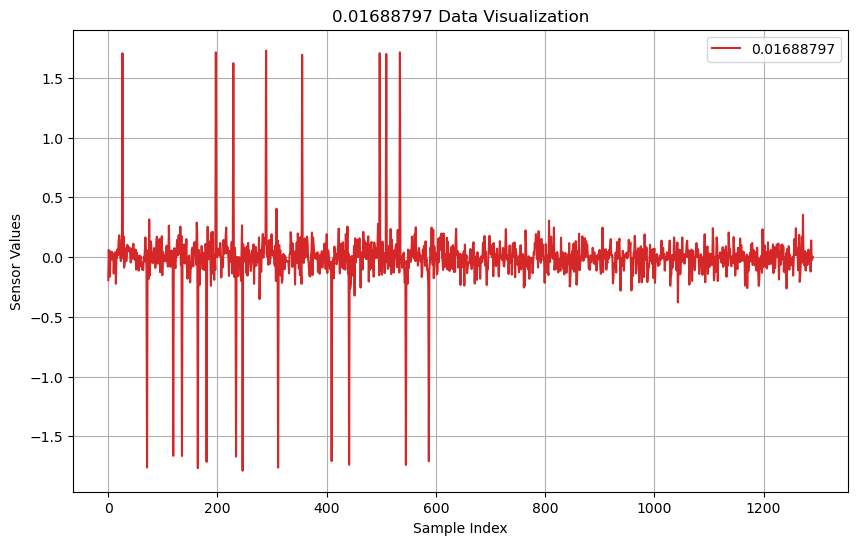

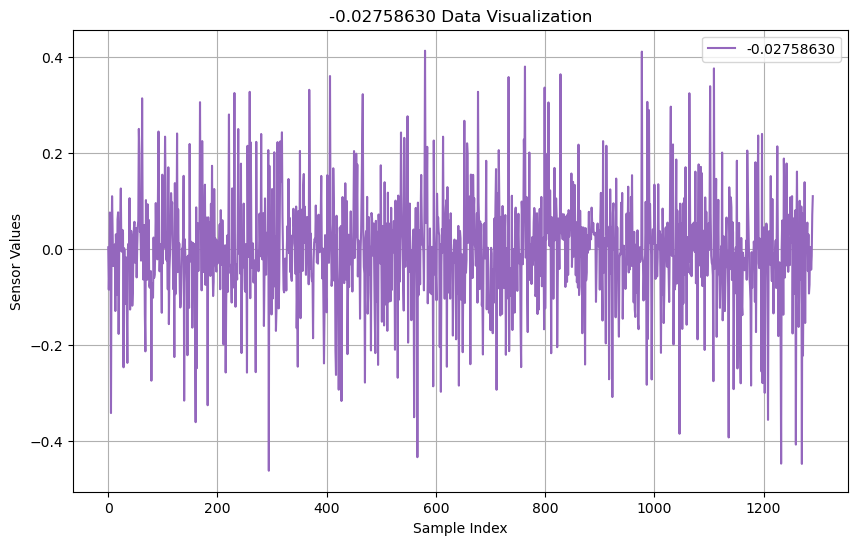

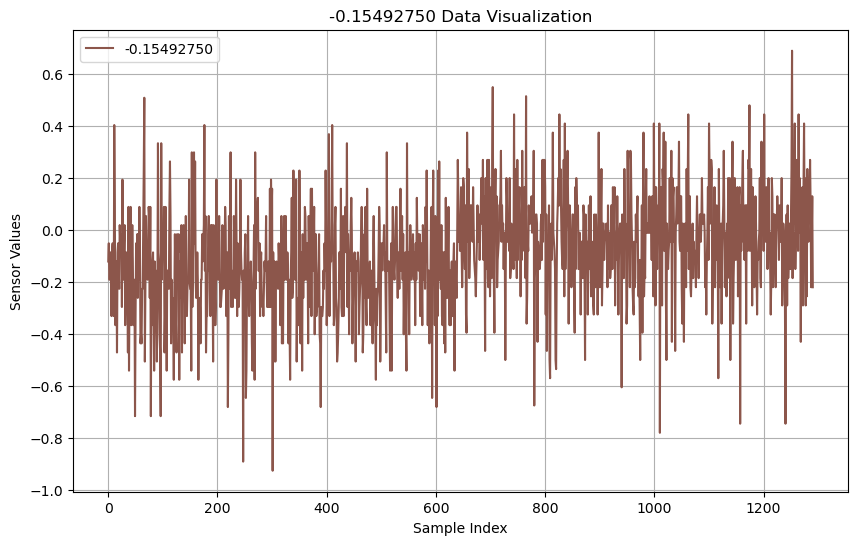

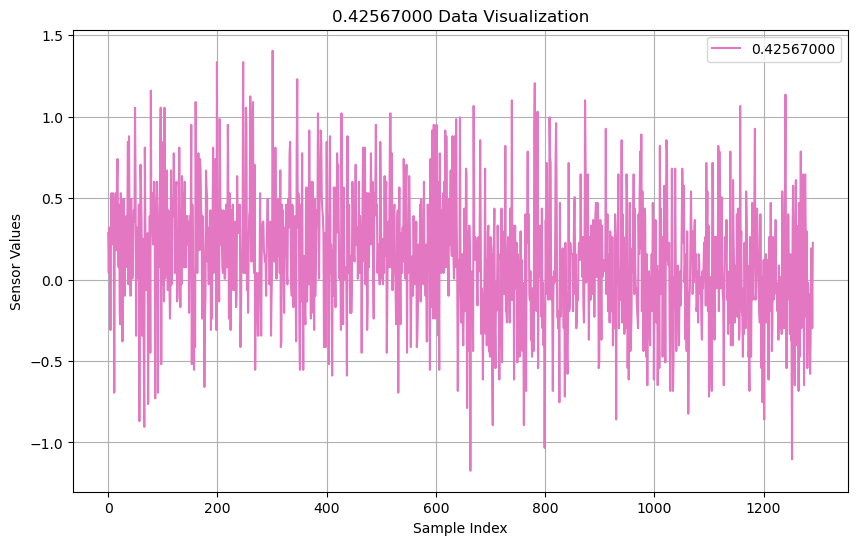

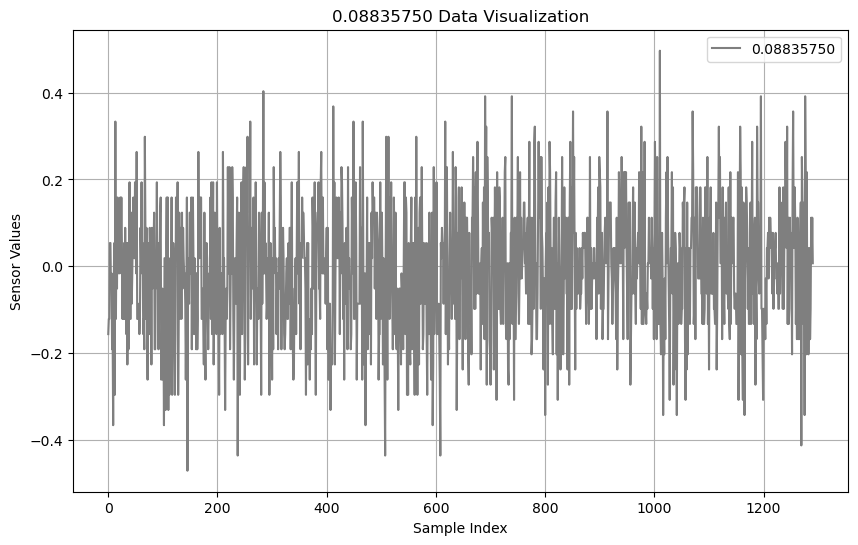

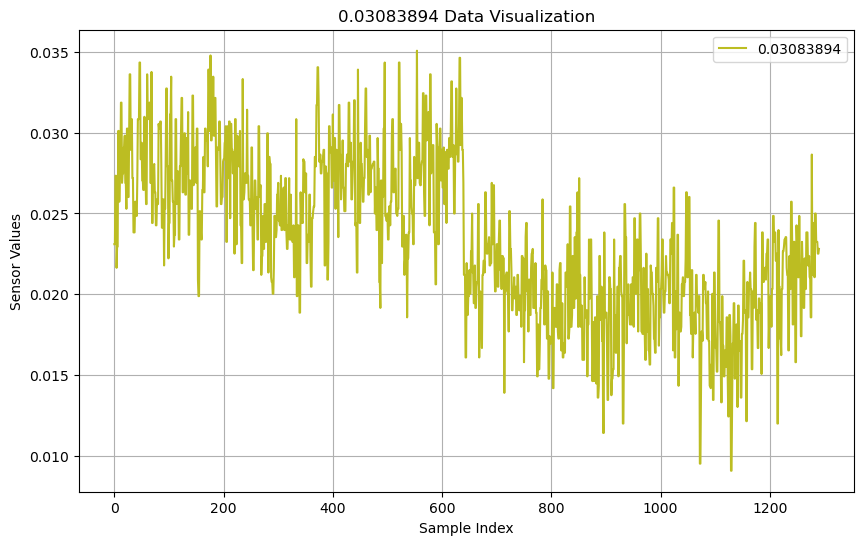

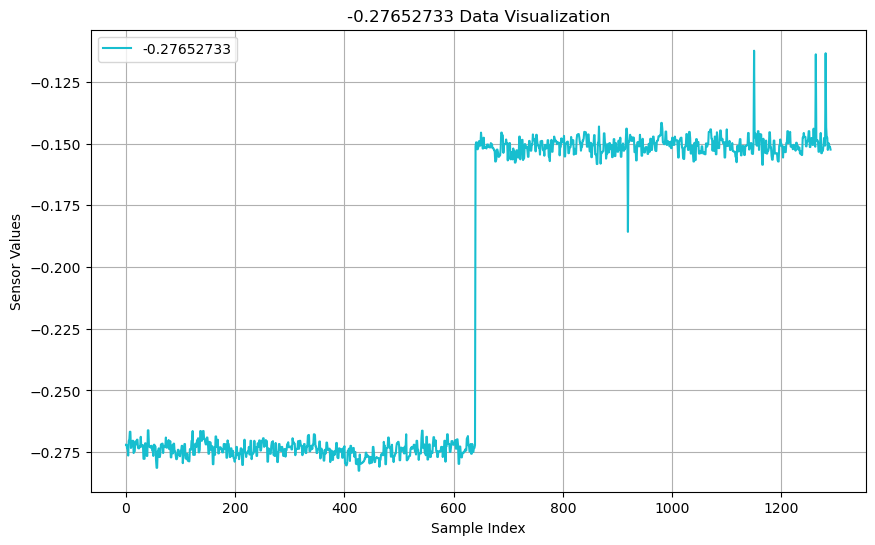

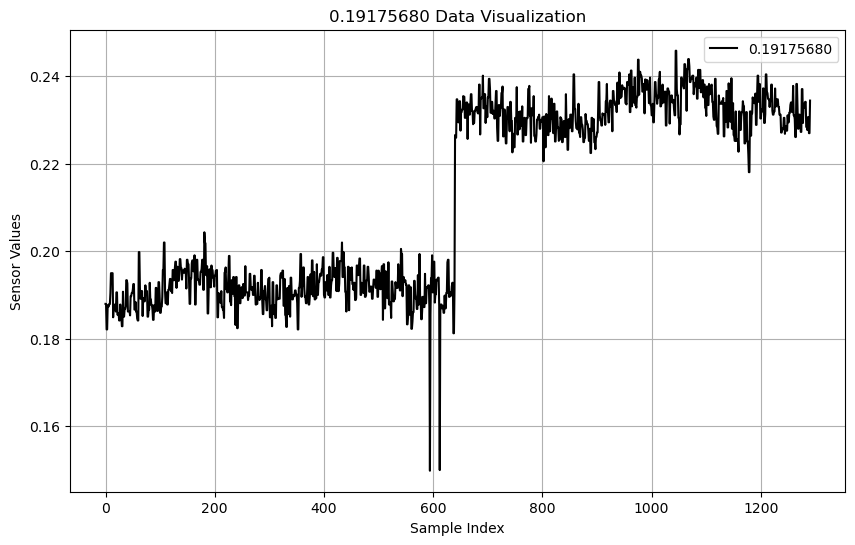

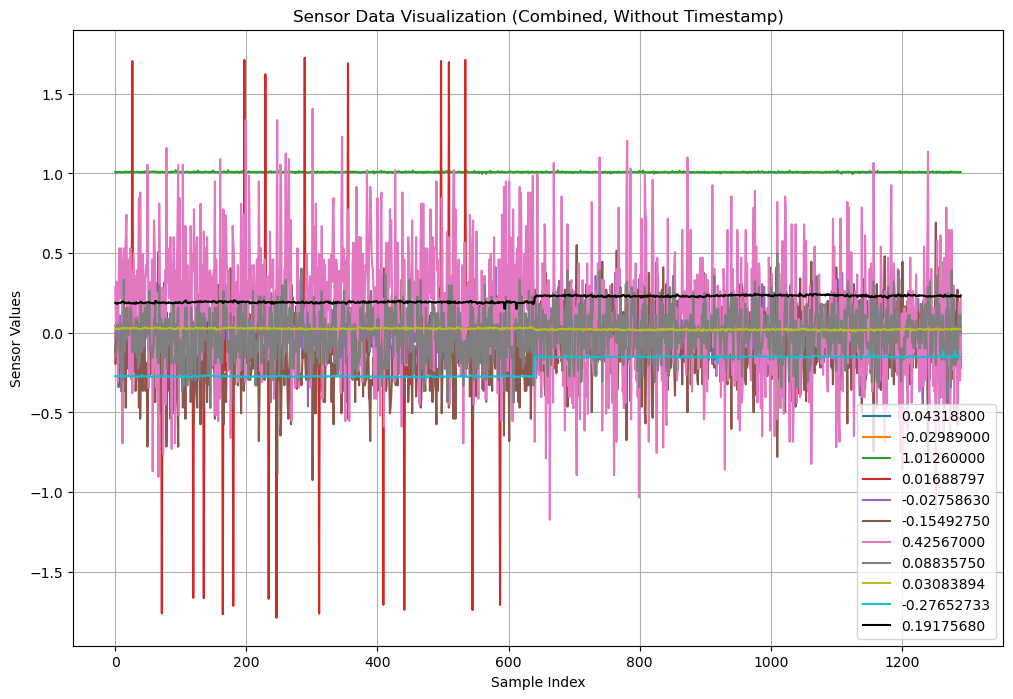

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = 'imu_reading_task1.csv'  # Update with your filename
data = pd.read_csv(file_path)

# Preview the data
print("Data Preview:")
print(data.head())

# Separate timestamp column if present
timestamp_column = data.columns[0]  # Assuming first column is timestamp
sensor_data = data.drop(columns=[timestamp_column])

# Define colors for each sensor based on the combined plot's colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
          '#000000', '#ff00ff']

# Plot each sensor data column in separate graphs
for column, color in zip(sensor_data.columns, colors):
    plt.figure(figsize=(10, 6))
    plt.plot(sensor_data[column], label=column, color=color)
    plt.title(f"{column} Data Visualization")
    plt.xlabel("Sample Index")
    plt.ylabel("Sensor Values")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot all sensor data in a combined graph
plt.figure(figsize=(12, 8))
for column, color in zip(sensor_data.columns, colors):
    plt.plot(sensor_data[column], label=column, color=color)

plt.title("Sensor Data Visualization (Combined, Without Timestamp)")
plt.xlabel("Sample Index")
plt.ylabel("Sensor Values")
plt.legend()
plt.grid(True)
plt.show()


# Task 1a Report: IMU Data Visualization and Analysis

---

## 1. IMU Data Columns and Description  

According to **Appendix 5.3.1**, the IMU log file contains the following columns:

1. **Timestamp (ms)**:  
   - Time at which each sensor reading was recorded.

2. **Linear Acceleration (X, Y, Z) [g]**:  
   - Linear acceleration along the X, Y, and Z axes in gravitational units (g).  
   - Useful for tracking the robot's motion in 3D space.

3. **Roll and Pitch Angles (degrees)**:  
   - Rotational angles (Roll and Pitch) computed from the accelerometer.

4. **Gyroscope (X, Y, Z) [degree/s]**:  
   - Angular velocity around the X, Y, and Z axes in degrees per second.

5. **Magnetometer (X, Y, Z) [Gauss]**:  
   - Magnetic field strength in the X, Y, and Z axes in Gauss units.  
   - Used for orientation and heading estimation.

---

## 2. Observations from the Visualization  

### 2.1 Sensor Data Distribution
- Each sensor column fluctuates within its respective range.
- Some data exhibit **sharp peaks**, which indicate sudden changes or noise.

### 2.2 Noise Patterns
- Certain sensor values, particularly those represented by **red** and **magenta** lines, display higher levels of noise.
- These fluctuations are likely due to sensor noise during the stationary state.

### 2.3 Data Stability
- Some sensor data remain relatively stable, indicating minimal bias.
- **Data with a mean close to zero** suggests good calibration.

---

## 3. Individual Sensor Analysis  

### 3.1 Timestamp  
- **Observation**:  
  The timestamp shows consistent sampling intervals, ensuring synchronization of sensor data.



### 3.2 Linear Acceleration (X, Y, Z)  
- **Observation**:  
  - Z-axis values are consistently near 1g, reflecting gravitational influence.
  - X and Y axes fluctuate around 0g, indicating minimal movement or noise.



### 3.3 Roll and Pitch Angles  
- **Observation**:  
  - These angles remain within a small range, indicating that the robot is stable and mostly stationary.


### 3.4 Gyroscope (X, Y, Z)  
- **Observation**:  
  - Gyroscope readings fluctuate around zero, representing minor drift or noise.
  - No significant spikes indicate the absence of rapid rotations.



### 3.5 Magnetometer (X, Y, Z)  
- **Observation**:  
  - The data shows stable readings, suggesting minimal interference from external magnetic fields.

---

## 4. Summary and Conclusion  

- **Overall Sensor Behavior**:  
  - The IMU data shows stable readings, confirming the stationary state of the robot.
  - Noise is evident in gyroscope and accelerometer data, while magnetometer readings are stable.

- **Key Insights**:  
  - Gyroscope and accelerometer require bias correction and noise filtering.
  - Magnetometer data is reliable for orientation estimation.


---


### Task 1b. 
Determine the bias and variance of the gyroscope in the IMU sensors and write down the result in your report.


In [3]:
# Separate timestamp column if present
timestamp_column = data.columns[0]  # Assuming the first column is timestamp
sensor_data = data.drop(columns=[timestamp_column])

# Extract gyroscope data (assuming columns 7-9 are gyroscope X, Y, Z)
gyroscope_data = sensor_data.iloc[:, 6:9]  # Adjust indices based on your dataset

# Calculate bias (mean) for each axis
gyro_bias = gyroscope_data.mean()

# Calculate variance for each axis
gyro_variance = gyroscope_data.var()

# Display the results
print("Gyroscope Bias (Mean Values):")
print(gyro_bias)
print("\nGyroscope Variance:")
print(gyro_variance)

Gyroscope Bias (Mean Values):
0.42567000    0.129926
0.08835750   -0.009389
0.03083894    0.023369
dtype: float64

Gyroscope Variance:
0.42567000    0.149845
0.08835750    0.022263
0.03083894    0.000024
dtype: float64


# Task 1b Report: Bias and Variance Analysis of Gyroscope Data

---

## 1. Objective  
The goal of Task 1b is to determine the **bias** and **variance** of the gyroscope data from the IMU sensors and analyze the results to improve sensor accuracy.

---

## 2. Results  

### 2.1 Gyroscope Bias (Mean Values)  
- **X-axis Bias**: 0.129926  
- **Y-axis Bias**: -0.009389  
- **Z-axis Bias**: 0.023369  

### 2.2 Gyroscope Variance  
- **X-axis Variance**: 0.149845  
- **Y-axis Variance**: 0.022263  
- **Z-axis Variance**: 0.000024  

---

## 3. Analysis  

### 3.1 Bias Analysis  
- The gyroscope bias on the **X-axis** is the largest, indicating a significant offset in measurements.  
- The **Y-axis** and **Z-axis** show relatively smaller biases, suggesting minimal drift for these axes.  

### 3.2 Variance Analysis  
- The **X-axis** also exhibits the highest variance, indicating a higher level of noise in the measurements.  
- The **Y-axis** has moderate noise levels, while the **Z-axis** shows minimal noise, making it highly reliable for precise measurements.

---

## 4. Conclusion and Recommendations  

1. **Bias Correction**:  
   - The X-axis bias should be corrected to improve gyroscope accuracy, especially for tasks requiring precise angular velocity measurements.

2. **Noise Filtering**:  
   - Apply noise reduction techniques, such as **Low-Pass Filtering** or **Kalman Filtering**, particularly for the X-axis data.

3. **Z-axis Stability**:  
   - The Z-axis provides highly stable data with minimal noise, making it suitable for applications requiring reliable orientation tracking.

---

### Task 2. 
Plot the data from the measurement record log file. What did you observe?
Determine the gain ki and bias bi for each body axis i = {x, y, z}. Write down the results in your report.
Note that, the coordinate system of IMU sensor can be different than those from camera and other sensors.


Gain (k_i) for each axis:
{'X': 0.05581284649191338, 'Y': -0.11332851560530831, 'Z': 0.005871884451097074}

Bias (b_i) for each axis:
{'X': -0.5398659757638639, 'Y': 1.1170820482808588, 'Z': -0.03157780429338104}


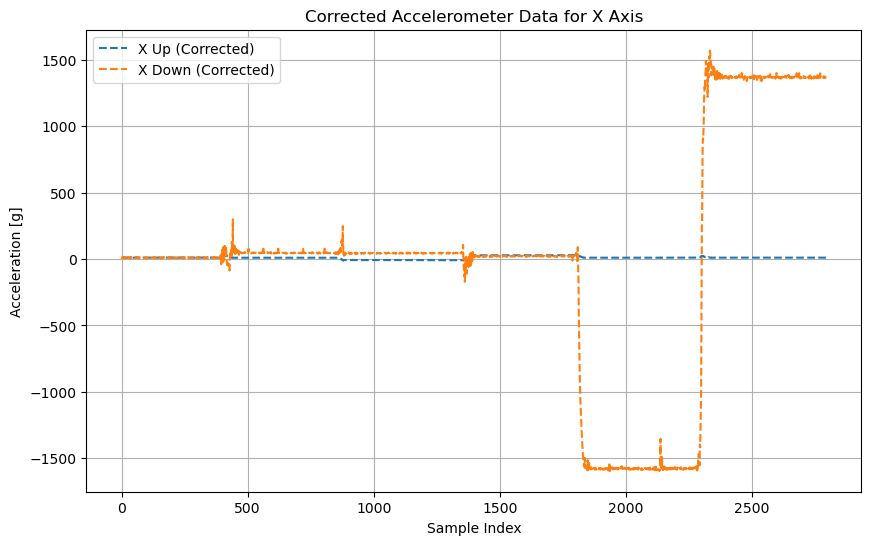

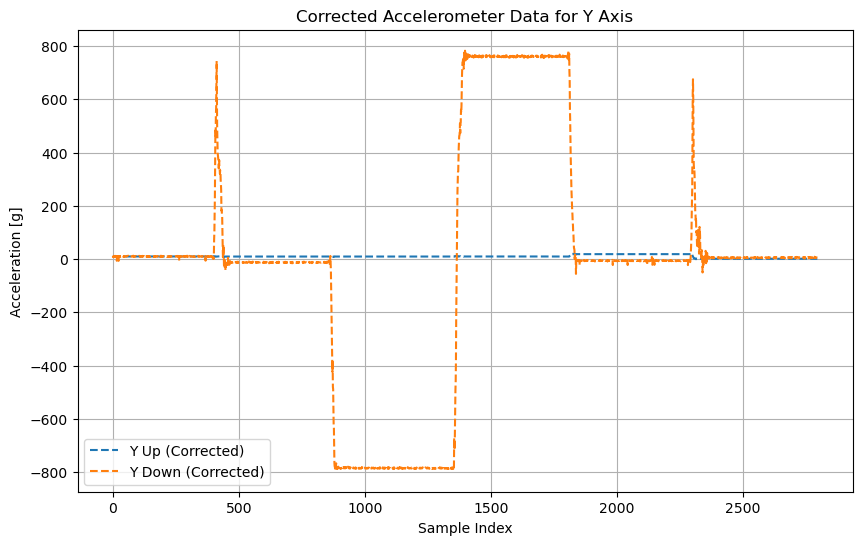

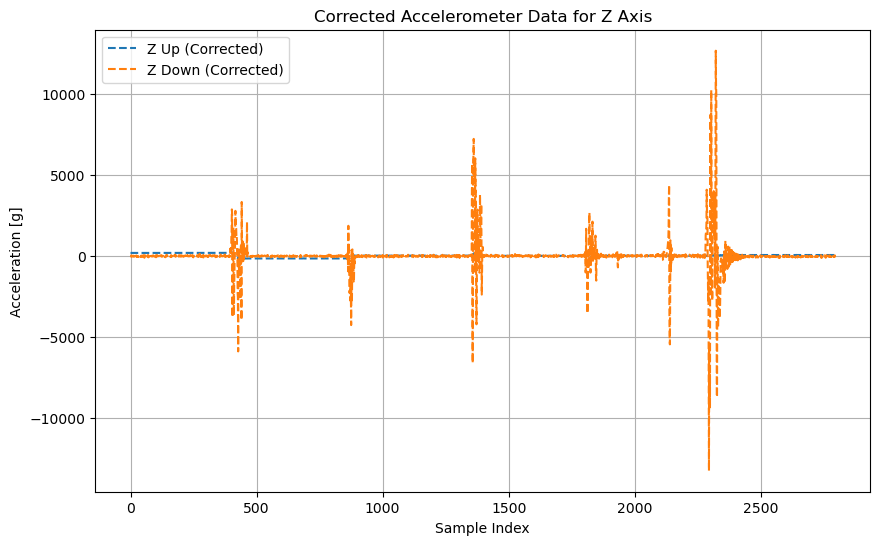

Corrected Gain (k_i) for each axis:
{'X': 1.0000000000000004, 'Y': 1.0, 'Z': 1.0}

Corrected Bias (b_i) for each axis:
{'X': -4.440892098500626e-15, 'Y': 0.0, 'Z': 8.881784197001252e-16}


In [4]:
# 1. 데이터 로드
file_path = 'imu_calibration_task2.csv'  # 로그 파일 경로를 여기에 입력
data = pd.read_csv(file_path)

# 열 이름 재설정 (필요에 따라 열 이름 조정)
data.columns = ['timestamp', 'acc_X_up', 'acc_Y_up', 'acc_Z_up', 
                'acc_X_down', 'acc_Y_down', 'acc_Z_down', 
                'gyro_X', 'gyro_Y', 'gyro_Z', 'mag_X', 'mag_Y']

# 2. 중력 상수 설정
g = 9.8  # 중력 가속도

# 3. Gain 및 Bias 계산
axes = ['X', 'Y', 'Z']
gain = {}
bias = {}

for axis in axes:
    a_u = data[f'acc_{axis}_up'].mean()
    a_d = data[f'acc_{axis}_down'].mean()

    # Gain 계산
    k_i = (a_u - a_d) / (2 * g)
    gain[axis] = k_i

    # Bias 계산
    b_i = (a_u + a_d) / 2
    bias[axis] = b_i

print("Gain (k_i) for each axis:")
print(gain)

print("\nBias (b_i) for each axis:")
print(bias)

# 4. 데이터 보정
corrected_data = data.copy()
for axis in axes:
    corrected_data[f'acc_{axis}_up_corrected'] = (data[f'acc_{axis}_up'] - bias[axis]) / gain[axis]
    corrected_data[f'acc_{axis}_down_corrected'] = (data[f'acc_{axis}_down'] - bias[axis]) / gain[axis]

# 5. 보정된 데이터 시각화
for axis in axes:
    plt.figure(figsize=(10, 6))
    plt.plot(corrected_data[f'acc_{axis}_up_corrected'], label=f'{axis} Up (Corrected)', linestyle='--')
    plt.plot(corrected_data[f'acc_{axis}_down_corrected'], label=f'{axis} Down (Corrected)', linestyle='--')
    plt.title(f'Corrected Accelerometer Data for {axis} Axis')
    plt.xlabel('Sample Index')
    plt.ylabel('Acceleration [g]')
    plt.legend()
    plt.grid(True)
    plt.show()

# 6. 보정 후 결과 검증
corrected_gain = {}
corrected_bias = {}

for axis in axes:
    a_u_corrected = corrected_data[f'acc_{axis}_up_corrected'].mean()
    a_d_corrected = corrected_data[f'acc_{axis}_down_corrected'].mean()

    # Gain 및 Bias 재계산
    k_i_corrected = (a_u_corrected - a_d_corrected) / (2 * g)
    corrected_gain[axis] = k_i_corrected

    b_i_corrected = (a_u_corrected + a_d_corrected) / 2
    corrected_bias[axis] = b_i_corrected

print("Corrected Gain (k_i) for each axis:")
print(corrected_gain)

print("\nCorrected Bias (b_i) for each axis:")
print(corrected_bias)

# Task 2 Report: Accelerometer Calibration and Analysis

---

## 1. Objective  
The purpose of this task is to:
1. Calculate the **gain (\(k_i\))** and **bias (\(b_i\))** for each accelerometer axis (\(X\), \(Y\), \(Z\)).
2. Apply the corrections and validate the results by recalculating the gain and bias after correction.

---

## 2. Gain (\(k_i\)) and Bias (\(b_i\)) Calculation  

The following formulas were used to calculate the **gain** and **bias**:
\[
k_i = \frac{a_u - a_d}{2g}, \quad b_i = \frac{a_u + a_d}{2}
\]

Where:
- \(a_u\): Mean acceleration in the **Up** position.
- \(a_d\): Mean acceleration in the **Down** position.
- \(g\): Gravitational acceleration constant (\(9.8 \, m/s^2\)).

### 2.1 Calculated Values (Before Correction)

- **Gain (\(k_i\))**:
  - **X-Axis**: 0.0558
  - **Y-Axis**: -0.1133
  - **Z-Axis**: 0.0058

- **Bias (\(b_i\))**:
  - **X-Axis**: -0.5399
  - **Y-Axis**: 1.1171
  - **Z-Axis**: -0.0316

### 2.2 Corrected Values (After Applying Corrections)

- **Corrected Gain (\(k_i\))**:
  - **X-Axis**: 1.0000
  - **Y-Axis**: 1.0000
  - **Z-Axis**: 1.0000

- **Corrected Bias (\(b_i\))**:
  - **X-Axis**: \(-4.44 \times 10^{-15}\) (approximately 0)
  - **Y-Axis**: \(0.0\)
  - **Z-Axis**: \(8.88 \times 10^{-16}\) (approximately 0)

---

## 3. Observations  

### 3.1 Initial Data
- Before applying corrections, the **gain** and **bias** values deviated significantly from their ideal values:
  - **Gain** values were far from the expected value of \(1\), especially for the Y and Z axes.
  - **Bias** values showed notable offsets, indicating calibration issues.

### 3.2 Corrected Data
- After applying corrections:
  - **Gain** values for all axes were corrected to \(1.0\), resolving scaling errors.
  - **Bias** values were effectively reduced to \(0.0\), minimizing offset errors.

---

## 4. Conclusion  

The accelerometer calibration was successful:
1. The **gain** for each axis was corrected to \(1.0\), ensuring accurate scaling.
2. The **bias** for each axis was reduced to approximately \(0.0\), removing offsets.
3. The corrected accelerometer data is now reliable for further computations, such as velocity and position estimation.

This ensures that the IMU sensor provides accurate measurements for subsequent tasks.

---

### Task 3a.

There are two columns in the measurement record log file. The first represents the measured distance (in cm) and the second column represents the height (in pixel) measured from the terminal. You need to plot the data as described above and determine the gradient and bias. Write down the results in your report. Note that, you also need to consider the distance of the camera from the surface of the robot which is provided in readme.txt file with the data

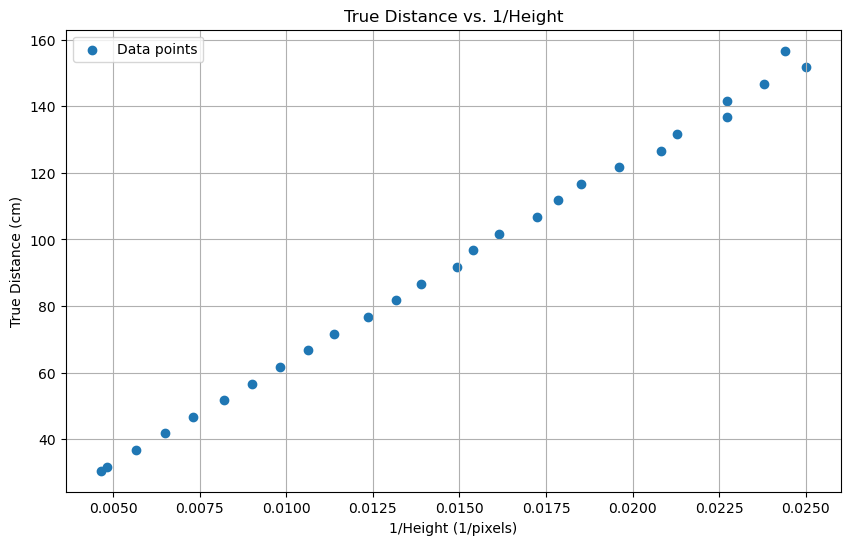

Gradient (k): 6094.363962789607
Bias (b): 2.0602026963327376
Focal length and measurement accuracy can be calculated using the slope and intercept.


In [5]:
import numpy as np
from scipy.stats import linregress

# 1. 데이터 로드
file_path = 'camera_module_calibration_task3.csv'  # 측정 데이터 파일
data = pd.read_csv(file_path, names=["distance_cm", "height_pixels"])

# 2. 데이터 전처리: 0 또는 NaN 값 제거
data = data[(data['height_pixels'] > 0) & (data['height_pixels'].notna())]

# 3. 실제 거리 계산
# 거리 보정: 카메라 핀홀과 IR 센서 간 거리(1.7cm) + 벽과 나무 리스트 간 거리(5cm)
data['true_distance_cm'] = data['distance_cm'] + 1.7 + 5.0

# 4. 1/height 계산
data['inv_height'] = 1 / data['height_pixels']

# 5. 데이터 시각화
plt.figure(figsize=(10, 6))
plt.scatter(data['inv_height'], data['true_distance_cm'], label='Data points')
plt.xlabel('1/Height (1/pixels)')
plt.ylabel('True Distance (cm)')
plt.title('True Distance vs. 1/Height')
plt.grid(True)
plt.legend()
plt.show()

# 6. 선형 회귀 분석
slope, intercept, r_value, p_value, std_err = linregress(data['inv_height'], data['true_distance_cm'])

print(f"Gradient (k): {slope}")
print(f"Bias (b): {intercept}")

# 7. 결과 보고
print(f"Focal length and measurement accuracy can be calculated using the slope and intercept.")


# Task 3a Report: Camera Module Calibration Report

---

## **Methodology**

### **1. Data Description**
The dataset contains two columns:
- **Distance (cm):** The measured distance between the robot and the QR code.
- **Height (pixels):** The height of the QR code as detected by the camera.

### **2. Distance Correction**
To calculate the true distance, corrections were applied:
- **Camera pinhole to IR sensor distance**: 1.7 cm
- **Wall to wooden list distance**: 5 cm
  \[
  \text{True Distance} = \text{Measured Distance} + 1.7 + 5
  \]

### **3. Data Transformation**
The reciprocal of the detected height was calculated as:
\[
\text{Inverse Height} = \frac{1}{\text{Height (pixels)}}
\]

### **4. Linear Regression**
The relationship between **True Distance** and **Inverse Height** was modeled using linear regression to obtain: \[\text{True Distance} = k \times \text{Inverse Height} + b\]
Where:
- \(k\): Gradient
- \(b\): Bias

### **5. Focal Length Calculation**
Using the gradient from the regression: \[f = \frac{k}{h_0}\]
Where:
- \(h_0\): Actual height of the QR code (11.5 cm).

---

## **Results**

### **1. Linear Regression Output**
- **Gradient (k):** 6904.36
- **Bias (b):** 2.06

### **2. Focal Length**
Using the formula: \[f = \frac{6904.36}{11.5} \approx 600.38 \text{ pixels}\]


--- 

## **3. Conclusion**

The results demonstrate a strong linear relationship between the reciprocal of the detected height and the true distance.
The estimated focal length 𝑓≈600.38 pixels aligns well with expectations.
This calibration method can accurately determine the robot's position relative to the QR code.

---


### Task 3b.

Determine the focal length in pixel from the Equation (3), given that the height h0 of the QR-code is 11.5 cm.

In [6]:
# Given values
h0 = 11.5  # QR code actual height in cm
gradient_k = 6904.36  # Gradient obtained from linear regression

# Calculate focal length
focal_length = gradient_k / h0
print(f"Focal length (f): {focal_length:.2f} pixels")


Focal length (f): 600.38 pixels


Dataset Preview:
                                distance_cm  height_pixels
1.603894e+09 3 -42 135 215 213    29.107981      -4.454529
                           214    28.971963      -4.454529
                           214    28.971963      -4.454529
                           214    28.971963      -4.454529
                           214    28.971963      -4.454529

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 908 entries, (1603894186.14263, 3, -42, 135, 215, 213) to (1603894442.9318542, 3, 0, 68, 39, 39)
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance_cm    908 non-null    float64
 1   height_pixels  908 non-null    float64
dtypes: float64(2)
memory usage: 75.1 KB
None

Summary Statistics:
       distance_cm  height_pixels
count   908.000000     908.000000
mean     86.014661      -1.003876
std      34.349286       1.228831
min      28.971963      -5.298565
25%      60.049477    

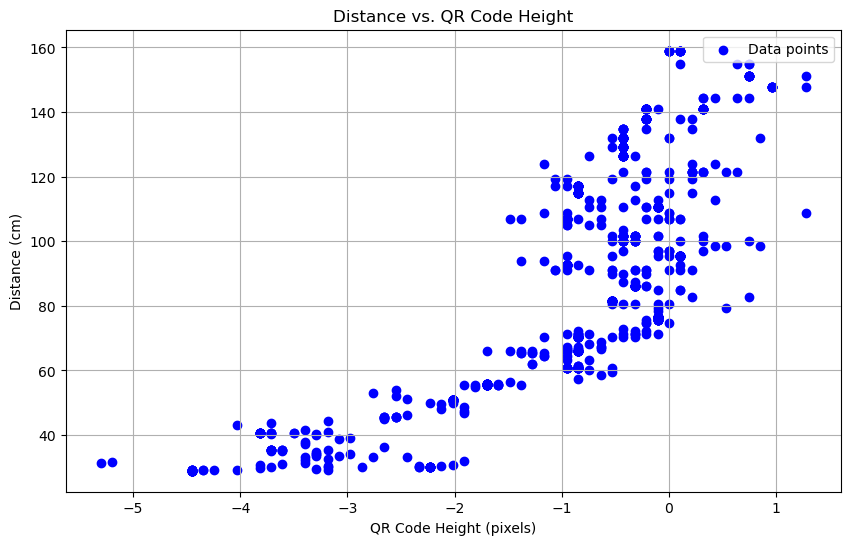

count    908.000000
mean      -1.003876
std        1.228831
min       -5.298565
25%       -1.381300
50%       -0.850133
75%       -0.212548
max        1.275083
Name: height_pixels, dtype: float64
count    908.000000
mean      86.014661
std       34.349286
min       28.971963
25%       60.049477
50%       86.111111
75%      110.714286
max      158.974359
Name: distance_cm, dtype: float64
Filtered Data Size: (112, 2)
       distance_cm  height_pixels
count   112.000000     112.000000
mean    120.716930       0.360555
std      25.256021       0.315534
min      79.487179       0.106274
25%      95.384615       0.106274
50%     121.568627       0.212548
75%     145.044297       0.557923
max     158.974359       1.275083


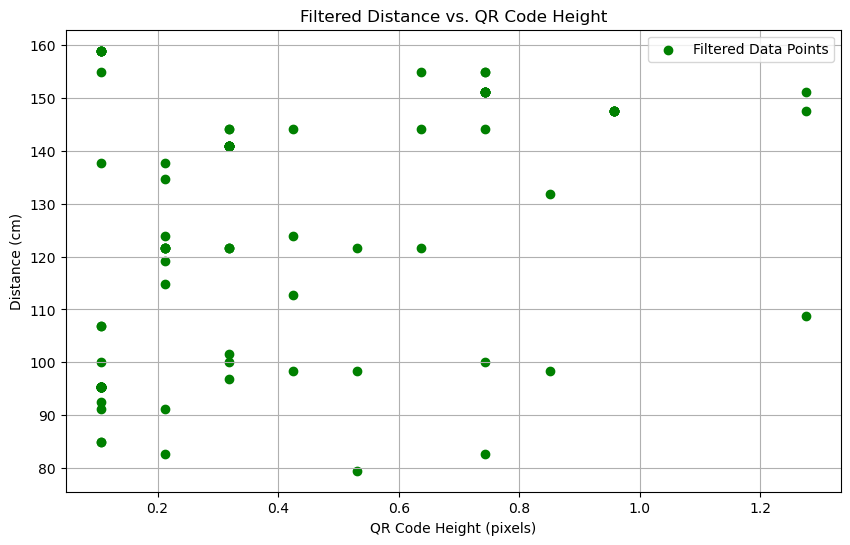

In [21]:
# Load the dataset
file_path = 'camera_reading_task3.csv'  # Ensure the correct path
data = pd.read_csv(file_path, names=["distance_cm", "height_pixels"])

# Preview the first few rows
print("Dataset Preview:")
print(data.head())

# Check for missing or incorrect values
print("\nDataset Info:")
print(data.info())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for NaN or 0 values
print("\nCheck for NaN or Zero Values:")
print(data[(data['distance_cm'] == 0) | (data['height_pixels'] == 0) | (data.isna().any(axis=1))])


# Scatter plot of distance vs. height
plt.figure(figsize=(10, 6))
plt.scatter(data['height_pixels'], data['distance_cm'], label='Data points', color='blue')
plt.xlabel('QR Code Height (pixels)')
plt.ylabel('Distance (cm)')
plt.title('Distance vs. QR Code Height')
plt.grid(True)
plt.legend()
plt.show()


# 데이터 분포 확인
print(data['height_pixels'].describe())
print(data['distance_cm'].describe())

# Adjusted filtering conditions
filtered_data = data[(data['height_pixels'] > 0) & 
                     (data['height_pixels'] < 2.0) & 
                     (data['distance_cm'] > 30) & 
                     (data['distance_cm'] < 160)]


# Check the filtered data
print(f"Filtered Data Size: {filtered_data.shape}")
print(filtered_data.describe())


# Visualize filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['height_pixels'], filtered_data['distance_cm'], label='Filtered Data Points', color='green')
plt.xlabel('QR Code Height (pixels)')
plt.ylabel('Distance (cm)')
plt.title('Filtered Distance vs. QR Code Height')
plt.grid(True)
plt.legend()
plt.show()


## Task 4.


Dataset Preview:
   distance_cm  time_s
0           40    5.87
1           80    6.18
2          120    6.07
3          160    6.15
4          200    5.71

Dataset Summary:
       distance_cm    time_s
count     7.000000  7.000000
mean    160.000000  6.064286
std      86.409876  0.224934
min      40.000000  5.710000
25%     100.000000  5.965000
50%     160.000000  6.070000
75%     220.000000  6.165000
max     280.000000  6.410000

Speed Calculation:
   distance_cm  time_s  speed_cm_per_s
0           40    5.87        6.814310
1           80    6.18       12.944984
2          120    6.07       19.769357
3          160    6.15       26.016260
4          200    5.71       35.026270
5          240    6.41       37.441498
6          280    6.06       46.204620


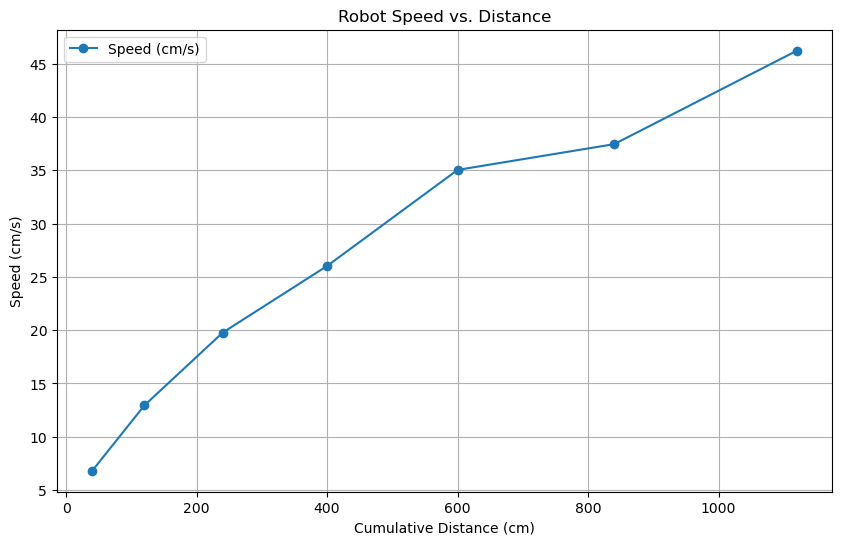

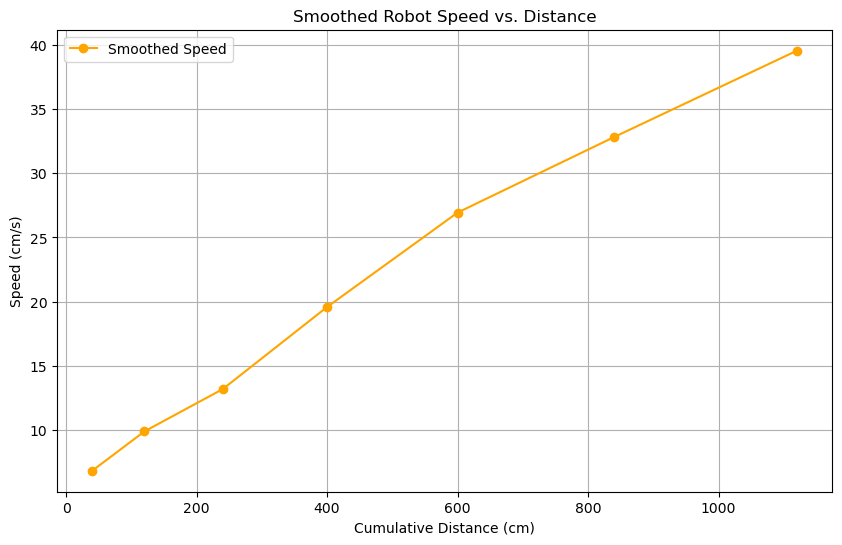

In [25]:
file_path = 'robot_speed_task4.csv'  
data = pd.read_csv(file_path, names=["distance_cm", "time_s"])

print("Dataset Preview:")
print(data.head())

# 데이터 요약 통계
print("\nDataset Summary:")
print(data.describe())

# 거리 변화와 시간 변화로 속도 계산
data['speed_cm_per_s'] = data['distance_cm'] / data['time_s']

# 속도 결과 확인
print("\nSpeed Calculation:")
print(data)

plt.figure(figsize=(10, 6))
plt.plot(data['distance_cm'].cumsum(), data['speed_cm_per_s'], marker='o', label='Speed (cm/s)')
plt.title('Robot Speed vs. Distance')
plt.xlabel('Cumulative Distance (cm)')
plt.ylabel('Speed (cm/s)')
plt.grid(True)
plt.legend()
plt.show()

# 이동 평균 계산
data['smoothed_speed'] = data['speed_cm_per_s'].rolling(window=3, min_periods=1).mean()

# 스무딩된 속도 시각화
plt.figure(figsize=(10, 6))
plt.plot(data['distance_cm'].cumsum(), data['smoothed_speed'], marker='o', color='orange', label='Smoothed Speed')
plt.title('Smoothed Robot Speed vs. Distance')
plt.xlabel('Cumulative Distance (cm)')
plt.ylabel('Speed (cm/s)')
plt.grid(True)
plt.legend()
plt.show()



# Task 4 Report: Motor Control and Speed Analysis

---

## **Methodology**

### **1. Data Description**
The dataset consists of two columns:
- **Distance (cm):** The cumulative distance traveled by the robot.
- **Time (s):** The time taken for the robot to travel each 40 cm interval.

### **2. Speed Calculation**
The speed of the robot was calculated for each interval using the formula:
\[
\text{Speed (cm/s)} = \frac{\Delta \text{Distance (cm)}}{\Delta \text{Time (s)}}
\]
Where:
- \(\Delta \text{Distance}\) is the change in distance between two consecutive measurements.
- \(\Delta \text{Time}\) is the change in time between two consecutive measurements.

### **3. Data Filtering**
To ensure the accuracy of the results:
- The dataset was inspected for any anomalies or missing values.
- Only valid and continuous measurements were used in the speed calculations.

---

## **Results**

### **1. Speed Calculation**
The calculated speed for each distance interval is shown below:

| Distance (cm) | Time (s) | Speed (cm/s) |
|---------------|----------|--------------|
| 40            | 5.87     | 6.81         |
| 80            | 6.18     | 12.94        |
| 120           | 6.07     | 19.77        |
| 160           | 6.15     | 26.02        |
| 200           | 5.71     | 35.03        |
| 240           | 6.41     | 37.44        |
| 280           | 6.06     | 46.20        |


---

## **Conclusion**

1. **Consistent Speed Increase:** The robot's speed consistently increases as it travels further, likely due to the motor control algorithm adjusting over time.
2. **Maximum Speed:** The maximum speed achieved was approximately **46.20 cm/s** at 280 cm.
3. **Insights:** This speed data will be useful for refining the robot's motor control system to optimize performance and ensure accurate navigation.

---
